In [3]:
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

In [68]:
(x_train,y_train), (x_test,y_test) = load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

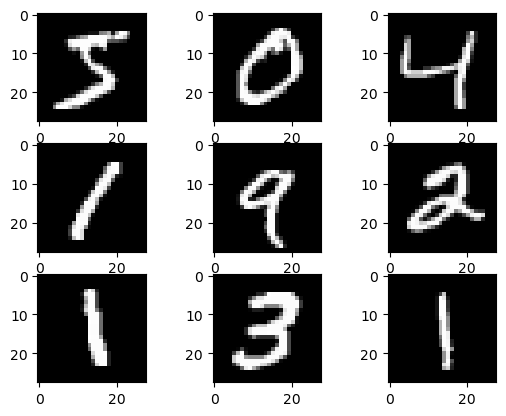

In [8]:
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [9]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],x_train.shape[2], 1))

In [10]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
x_train[0][0]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=uint8)

In [12]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [13]:
x_train[0][12]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.04313726],
       [0.74509805],
       [0.99215686],
       [0.27450982],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

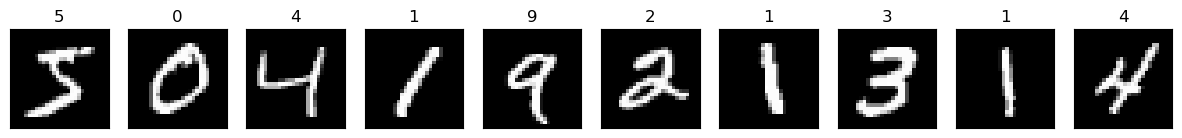

In [14]:
fig = plt.figure(figsize = (15,3))
for i in range(10):
    ax = fig.add_subplot(2,10,i+1,xticks = [],yticks=[])
    ax.imshow(np.squeeze(x_train[i]),cmap='gray')
    ax.set_title(y_train[i])

In [15]:
x_train[1].shape

(28, 28, 1)

In [16]:
x_train[1:]

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [17]:
inp_shape = x_train.shape[1:]

In [18]:
print(inp_shape)

(28, 28, 1)


In [19]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inp_shape))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48,(3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 48)     │        13,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       600,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 619,702 (2.36 MB)

 Trainable params: 619,702 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

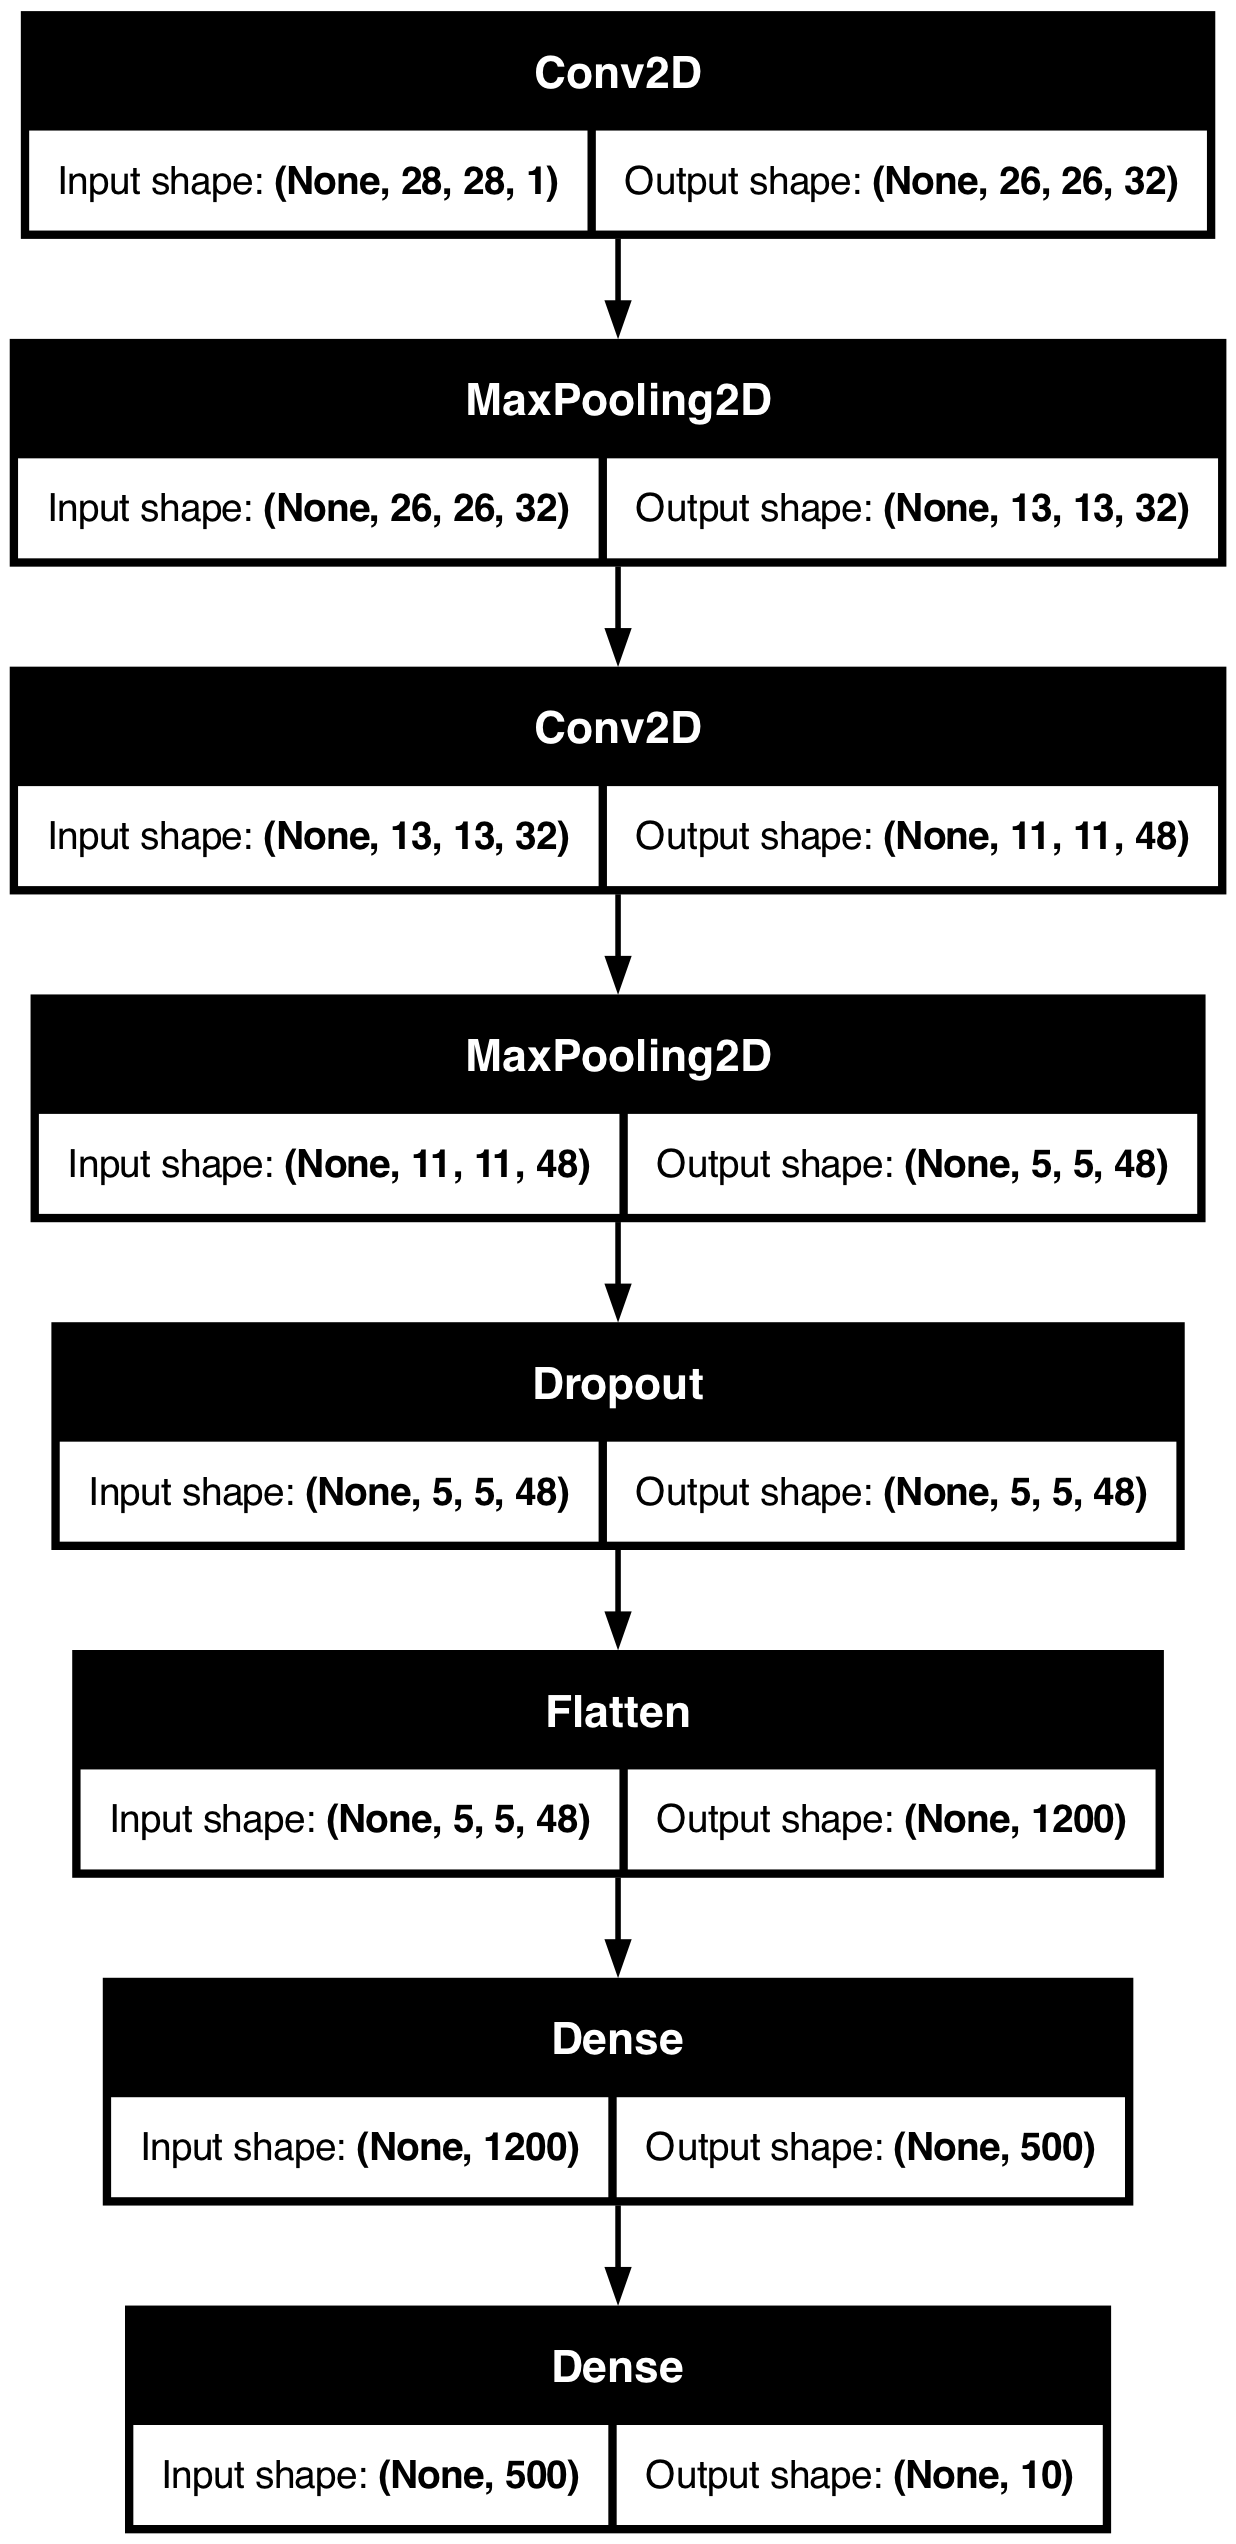

In [21]:
from tensorflow.keras.utils import plot_model

# Assuming `model` is already defined
plot_model(model, to_file='model.png', show_shapes=True)


In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [23]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 16s - 38ms/step - accuracy: 0.9235 - loss: 0.2521 - val_accuracy: 0.9822 - val_loss: 0.0590
Epoch 2/10
422/422 - 13s - 31ms/step - accuracy: 0.9741 - loss: 0.0818 - val_accuracy: 0.9890 - val_loss: 0.0396
Epoch 3/10
422/422 - 13s - 31ms/step - accuracy: 0.9814 - loss: 0.0587 - val_accuracy: 0.9905 - val_loss: 0.0385
Epoch 4/10
422/422 - 13s - 32ms/step - accuracy: 0.9850 - loss: 0.0494 - val_accuracy: 0.9902 - val_loss: 0.0356
Epoch 5/10
422/422 - 13s - 31ms/step - accuracy: 0.9862 - loss: 0.0421 - val_accuracy: 0.9928 - val_loss: 0.0287
Epoch 6/10
422/422 - 13s - 30ms/step - accuracy: 0.9881 - loss: 0.0368 - val_accuracy: 0.9908 - val_loss: 0.0339
Epoch 7/10
422/422 - 13s - 31ms/step - accuracy: 0.9888 - loss: 0.0337 - val_accuracy: 0.9918 - val_loss: 0.0326
Epoch 8/10
422/422 - 13s - 31ms/step - accuracy: 0.9908 - loss: 0.0297 - val_accuracy: 0.9928 - val_loss: 0.0293
Epoch 9/10
422/422 - 13s - 31ms/step - accuracy: 0.9913 - loss: 0.0264 - val_accuracy: 0.9910 - 

In [39]:
from keras.callbacks import ModelCheckpoint, EarlyStopping


In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [55]:
x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [53]:
y_test[0]

7

In [56]:
model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[3.6837157e-08, 2.1698767e-07, 4.5057470e-07, ..., 9.9999380e-01,
        2.0500570e-07, 3.7255691e-07],
       [4.2171626e-09, 5.1316107e-08, 1.0000000e+00, ..., 7.2173491e-12,
        4.5637652e-12, 2.6696451e-14],
       [1.2680259e-06, 9.9998510e-01, 5.7479804e-07, ..., 8.6243801e-07,
        2.2617987e-06, 2.7461939e-08],
       ...,
       [1.9446267e-14, 1.6590777e-11, 8.8483859e-11, ..., 1.7627080e-10,
        5.2413807e-09, 2.4948621e-09],
       [5.8163419e-08, 1.1467263e-12, 3.7744152e-11, ..., 5.0299353e-13,
        4.3697518e-04, 5.8672702e-09],
       [9.5767052e-07, 1.3132252e-10, 2.2752751e-08, ..., 1.8319749e-14,
        4.2725927e-07, 5.8587990e-10]], dtype=float32)

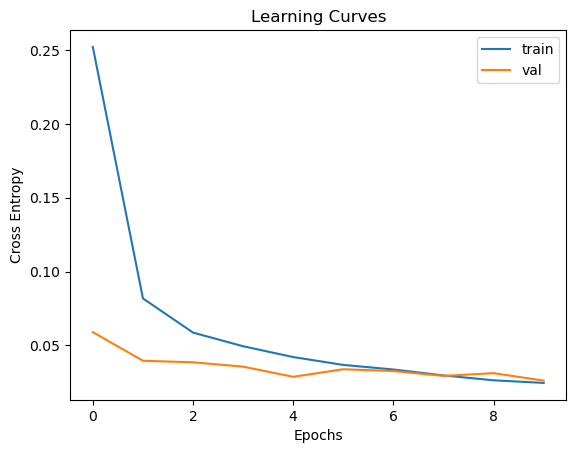

In [57]:
# ploting the learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epochs')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [64]:
x_test.shape

(10000, 28, 28, 1)

In [69]:
x_test[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [70]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 97.87999987602234


In [71]:
image = x_test[0]

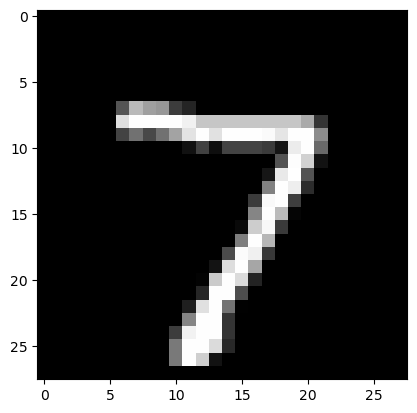

In [72]:
plt.imshow(np.squeeze(image), cmap = 'gray')

In [79]:
image = image.reshape(-1,28,28,1)

In [80]:
y_pred = model.predict([image])
print('Predicted: {}'. format(argmax(y_pred)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted: 7


### VGG16 model


In [81]:
#VGG16 model

model2 = Sequential()
model2.add(Conv2D(input_shape = (28,28,1), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model2.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model2.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
#current_size = 112*112*256
           
model2.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model2.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model2.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
#current_size = 56*56*256
               
model2.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu")) 
model2.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu")) 
model2.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu")) 
model2.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
#current_size = 28*28*512
           
model2.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model2.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model2.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model2.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
#current_size = 14*14*512
           
model2.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model2.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model2.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model2.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
#current_size = 7*7*512

model2.add(Flatten())
model2.add(Dense(units = 4096, activation = "relu"))
model2.add(Dense(units = 4096, activation = "relu"))

model2.add(Dense(units = 10, activation = "softmax"))

In [82]:
from keras.optimizers import Adam 
import keras

In [83]:
opt = Adam(learning_rate=0.001)
model2.compile(optimizer = opt, loss = keras.losses.categorical_crossentropy, metrics = ['accuracy']) 

In [86]:
model2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_49 (Conv2D)              │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,301,514 (512.32 MB)

 Trainable params: 134,301,514 (512.32 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
loss, accuracy = model2.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_7_1/Cast:0", shape=(None, 28, 28), dtype=float32). Expected shape (None, 224, 224, 3), but input has incompatible shape (None, 28, 28)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 28, 28), dtype=uint8)
  • training=False
  • mask=None